# Sample Analysis for Tracker Observables

Begin by importing the code, which I outsouced into `mycode.py` to keep this notebook nice and clean. 

In [1]:
from mycode import *

## Load Data and Prepare Weights

To load the data, we initialize a class `Analyzer`.
- If `inputfile` is not `None`, then the muon and neutrino spectra are just read from that file. This is the fast option. 
- Otherwise, the class loads all the data from the `/NumpyArrays` directory and compute the event weights. In this case you can save the data in an `outputfile` so that one can easily load it later on. 

In [2]:
analyser = Analyzer()

Prepare Data Manually
 ... found 205652 nu_mu events in 11.08 seconds
 ... found 53357 nu_e events in 6.54 seconds
 ... found 2944995 muon events in 119.19 seconds


Now, we can look at the statistics of muons. The following table shows the weight of individual muons in units of fb. So if this number is 0.2, then our MC statistics correspond the expected event rate for 5 fb$^{-1}$, and if it is 0.0066,then our MC statistics correspond the expected event rate for 150 fb$^{-1}$. 

In [3]:
analyser.get_muon_statistics()

121.119 : 8.905
327.154 : 2.077
524.136 : 0.58
721.13 : 0.214
924.133 : 0.189
1124.14 : 0.309
1324.14 : 0.327
1524.14 : 0.239
1724.13 : 0.145
1924.14 : 0.089
2124.14 : 0.068
2324.14 : 0.088
2521.12 : 0.085
2721.12 : 0.054
2921.12 : 0.042
3121.12 : 0.026
3321.12 : 0.012
3521.12 : 0.009


## Plot Individual Events

An individual event is characterized by a dictionary of its properties:
- `primaryEnergy` which is the energy of the incoming muon
- `zposition` indicating where the neutrino interacted (number meaningless for muons)
- `scintillator` indicating which scintillators where activated
- `calorimeter` giving the energy deposit in the calorimeter
- `hist1 ... hist4`: giving the coordinates of hits in the tracker
- `weight`: giving the event weight in units of `fb`
Let's look at one muon neutrino event:

In [4]:
print (analyser.numu_data[10])

{'primaryEnergy': 90.31156, 'zposition': 18.2, 'weight': 7.696115445752095e-05, 'scintillator': array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1]), 'calorimeter': 0.495, 'hits1': array([], dtype=float64), 'hits2': array([], dtype=float64), 'hits3': array([[ 8., 11.,  1.]]), 'hits4': array([[ 9., 10.,  1.]])}


Since the above format is a bit hard to read, we can also plot individual events. If you want to see a particular event, you can use `Analyser.display_event(event,filename)`. Alternatively, one can also use `Analyser.display_random_event(particle, requirement)` with particle being `muon`, `nu_mu` or `nu_el`. Here `requirement` adds some additional cuts on the event, when selecting it. 

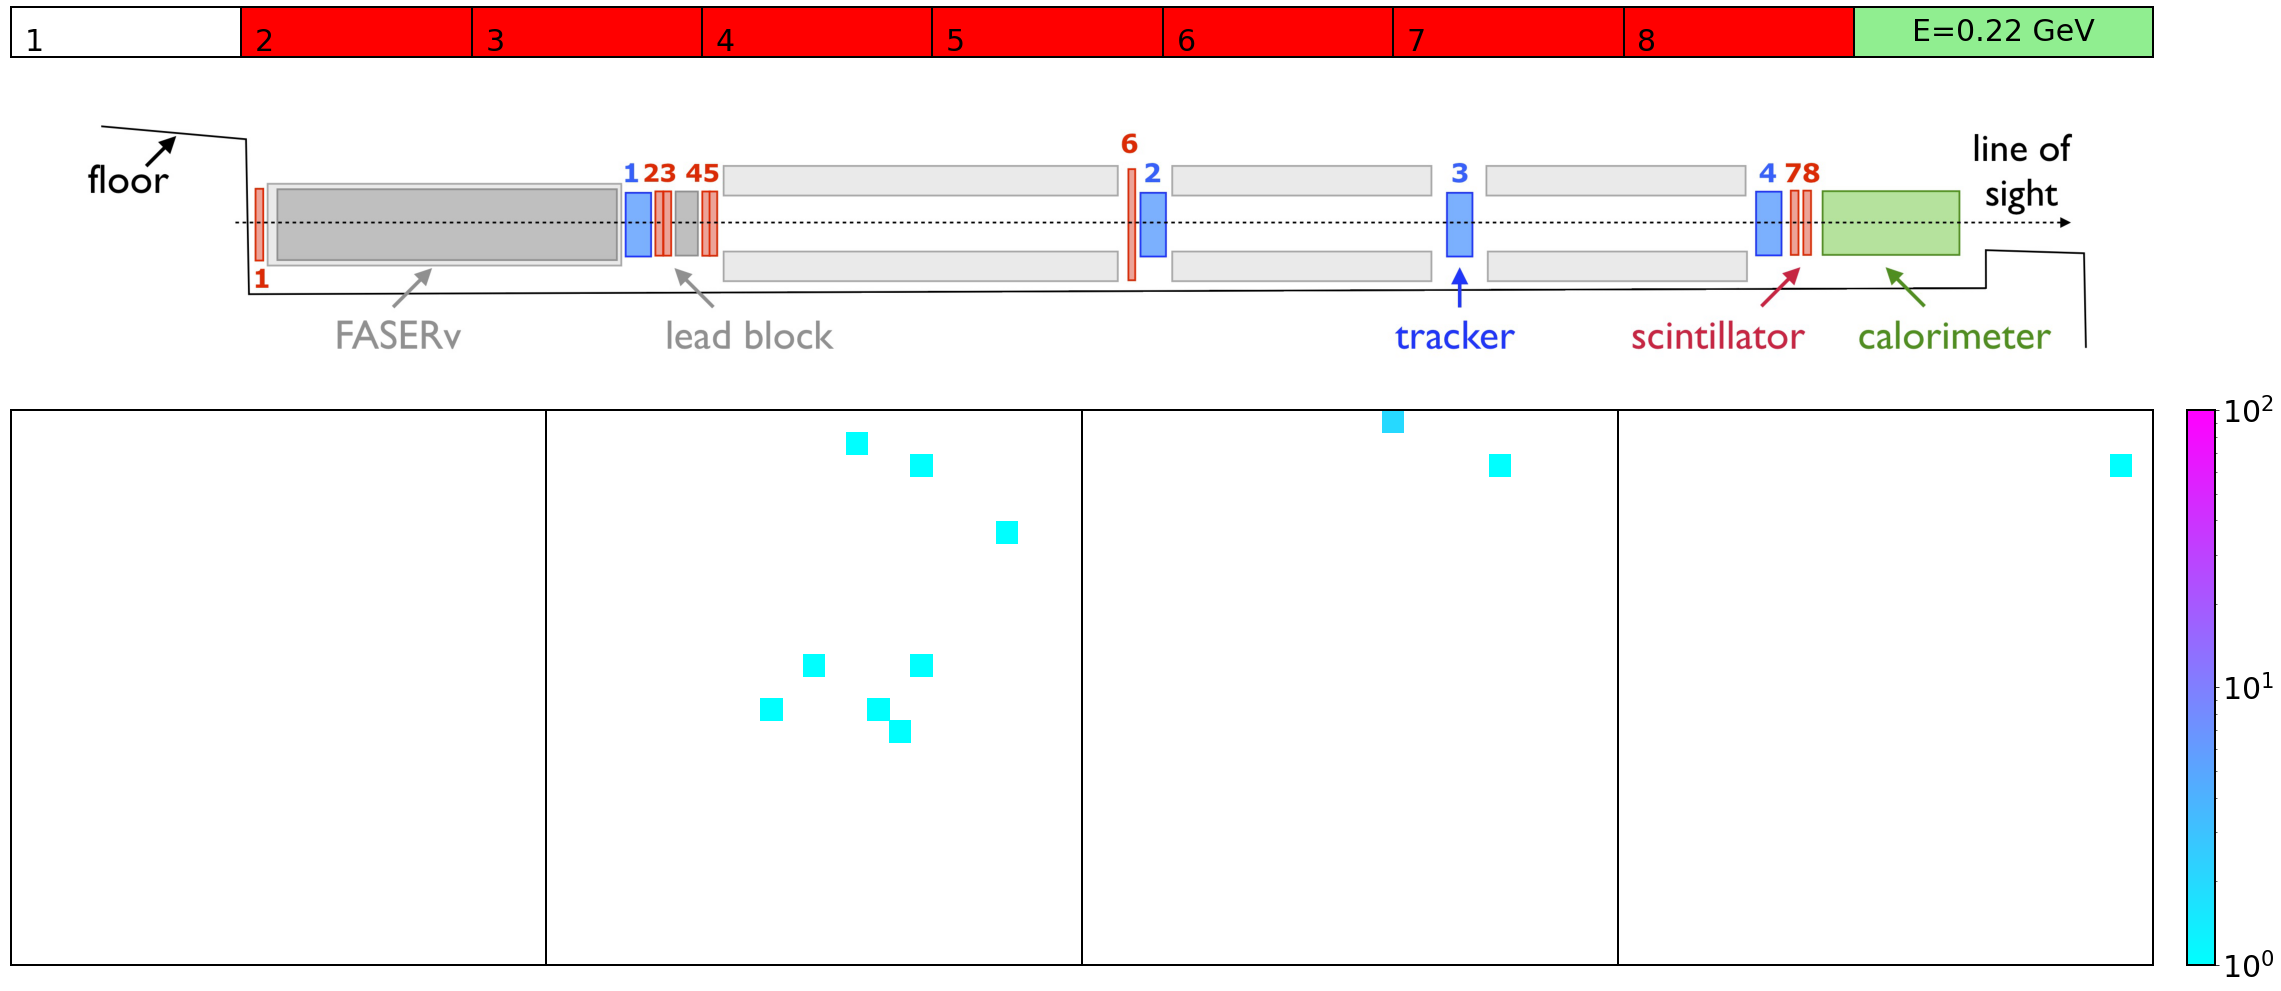

In [5]:
analyser.display_random_event(particle="nu_mu", requirement="(event['scintillator'] == [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]).all()")

## Data Analysis

At first, we can define some new obseravbles via `Analyser.define_observable()`. It then loops through all events, and stores an additional property. For example here, I add the property `passed_scintillator` which is `True` when the last 7 scintillators and the calorimeter are on, and `False` otherwise. The evnts now have a property `event['passed_scintillator']` which can be used later on. 

In [6]:
analyser.define_observable(
    name="passed_scintillator", 
    definition="(event['scintillator'] == [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]).all()"
)

In the next step, let's look at some distribution. This can be done using `Analyser.get_histodata()`, which takes 
- the `particle` (so `muon`, `nu_mu` and `nu_el`)
- the `observable` which can be any property of the event which can be called as `event[observable]`
- the `requirement` which specifies the event selection.
- the `bins` which specifies the binning

The function returns the binned data as an array, with the column corresponding to the bin center, the bin value and the uncertainty. 

Below we look at the calorimeter output for all events that have the previously defined scintillator signature. 

In [14]:
bins = np.logspace(-1,2,31)
requirement = "event['passed_scintillator']==True"

data_cut_numu = analyser.get_histodata(particle='nu_mu', observable='calorimeter', bins=bins, requirement=requirement)
data_cut_muon = analyser.get_histodata(particle='muon' , observable='calorimeter', bins=bins, requirement=requirement)

data_numu = analyser.get_histodata(particle='nu_mu', observable='calorimeter', bins=bins, requirement="True")
data_muon = analyser.get_histodata(particle='muon' , observable='calorimeter', bins=bins, requirement="True")

Let's now plot the result

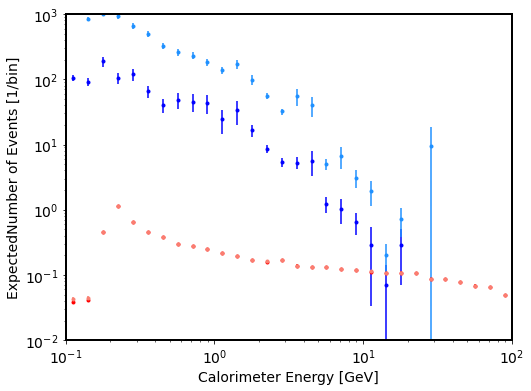

In [19]:
#prepare
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)

#add data
for x,y,yerr in data_cut_numu.T: ax.errorbar(x, y, yerr=yerr, fmt='.', color="red")
for x,y,yerr in data_cut_muon.T: ax.errorbar(x, y, yerr=yerr, fmt='.', color="blue")
for x,y,yerr in data_numu.T: ax.errorbar(x, y, yerr=yerr, fmt='.', color="salmon")
for x,y,yerr in data_muon.T: ax.errorbar(x, y, yerr=yerr, fmt='.', color="dodgerblue")


#finalize
ax.set_xlabel("Calorimeter Energy [GeV]")
ax.set_ylabel("ExpectedNumber of Events [1/bin]")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.1, 100)
ax.set_ylim(0.01,1000)
plt.show()